In [20]:
import matplotlib.pyplot as plt

from scipy import signal
from scipy.signal import butter, lfilter
from scipy.io import wavfile

import numpy as np
from pydub import AudioSegment


In [6]:
def mp3_to_wav(file_name: str):
    sound = AudioSegment.from_mp3(file_name)
    file_name = file_name.replace(".mp3", "")
    sound.export(f"{file_name}.wav", format="wav")


In [7]:
mp3_to_wav("sound_from_diff_directions.mp3")

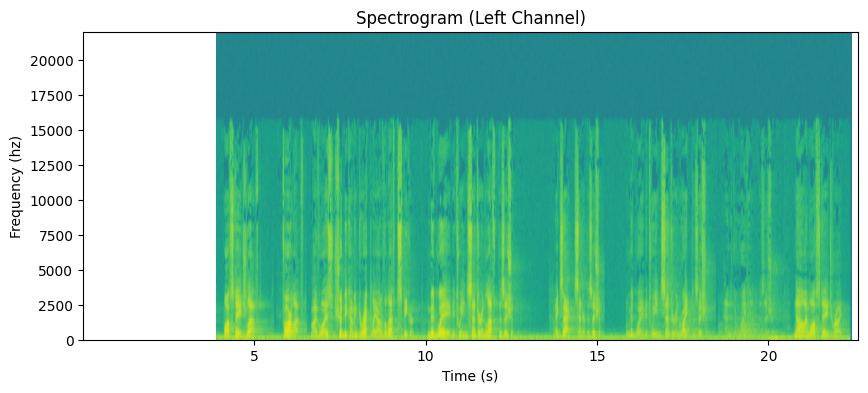

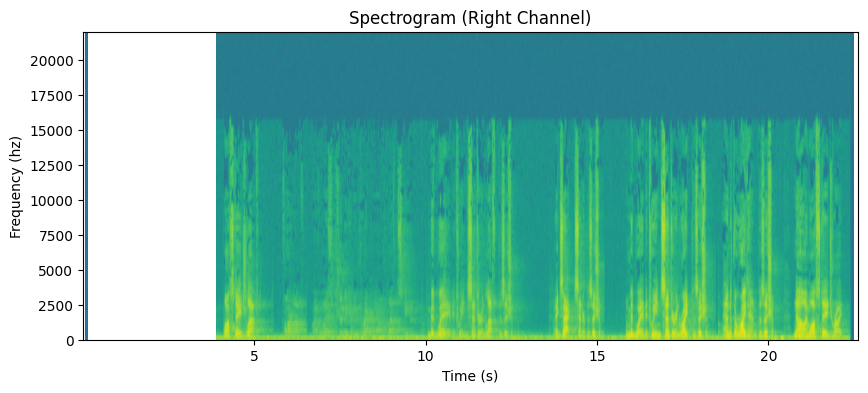

In [18]:
Fs, aud = wavfile.read('sound_from_diff_directions.wav')

# Select left and right channels
aud_left = aud[:, 0]
aud_right = aud[:, 1]

# Create spectrogram for left channel
plt.figure(figsize=(10, 4))
plt.specgram(aud_left, Fs=Fs)
plt.title('Spectrogram (Left Channel)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (hz)')
plt.show()

# Create spectrogram for right channel
plt.figure(figsize=(10, 4))
plt.specgram(aud_right, Fs=Fs)
plt.title('Spectrogram (Right Channel)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (hz)')
plt.show()


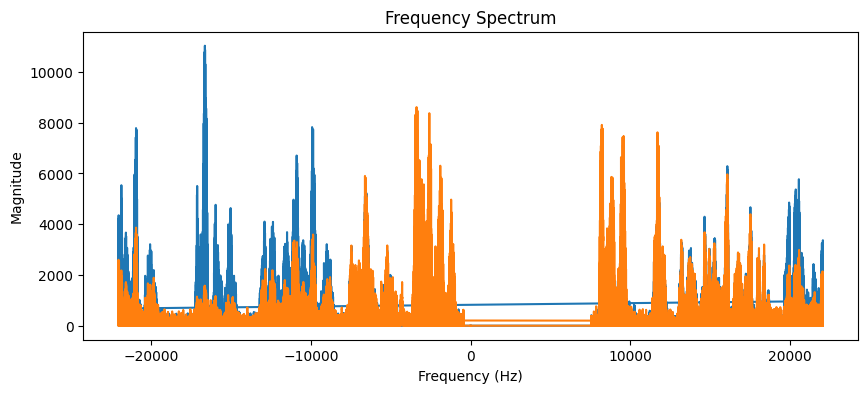

In [16]:
'''
To visualize the frequency spectrum of an audio signal, you can use the Fast Fourier Transform (FFT) provided by the `numpy` library. 

1. Import the necessary libraries (matplotlib, numpy, and scipy).
2. Read the audio file using `wavfile.read`.
3. Compute the FFT of the audio signal using `numpy.fft.fft`.
4. Compute the frequencies for the FFT using `numpy.fft.fftfreq`.
5. Plot the absolute value of the FFT spectrum.
'''

# Read the audio file
Fs, aud = wavfile.read('sound_from_diff_directions.wav')

# Compute the FFT
aud_fft = np.fft.fft(aud)

# Compute the frequencies
freqs = np.fft.fftfreq(len(aud), 1/Fs)

# Plot the spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(aud_fft))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

'''
The blue and orange lines in your plot represent the frequency spectrum of the left and right channels of your stereo audio file, respectively. 

When you read a stereo audio file using `wavfile.read`, it returns a two-dimensional array where the first dimension represents time and the second dimension has two elements representing the left and right channels. When you compute the FFT and plot the spectrum, it computes and plots the spectrum for each channel separately.

So, in your plot:
- The blue line represents the frequency spectrum of the left channel.
- The orange line represents the frequency spectrum of the right channel.
'''

plt.show()


In [22]:
'''
You can apply a filter to an audio signal using the `scipy.signal` library in Python.

1. Import the necessary libraries (scipy and numpy).
2. Read the audio file using `wavfile.read`.
3. Design a filter using `scipy.signal.butter`.
4. Apply the filter to the audio signal using `scipy.signal.lfilter`.
5. Write the filtered audio to a new file using `wavfile.write`.
'''

# Read the audio file
Fs, aud = wavfile.read('sound_from_diff_directions.wav')

# Design a Butterworth filter
N  = 2    # Filter order
Wn = 0.1  # Cutoff frequency
B, A = butter(N, Wn, output='ba')

# Apply the filter to the audio signal
filtered_aud = lfilter(B, A, aud)

# Write the filtered audio to a new file
wavfile.write('filtered_sound.wav', Fs, filtered_aud.astype(np.int16))